### Deliverable 1: Preprocessing the Data for a Neural Network

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df_new=application_df.drop(columns=["EIN", "NAME"])
application_df_new.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Generate our categorical variable list
application_cat = application_df_new.dtypes[application_df_new.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [10]:
# Determine the number of unique values in each column.
application_df_new[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [8]:
# Generate our variable list
application_all_var = application_df_new.dtypes.index.tolist()
application_all_var

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'STATUS',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT',
 'IS_SUCCESSFUL']

In [20]:
# Determine the number of unique values in each column.
application_df_new[application_all_var].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [21]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df_new.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

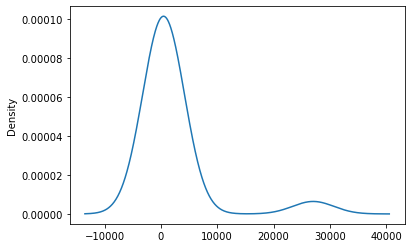

In [22]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [23]:
# Determine which values to replace if counts are less than ...?
replace_application=list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for i in replace_application:
    application_df_new.APPLICATION_TYPE = application_df_new.APPLICATION_TYPE.replace(i,"Other")
    
# Check to make sure binning was successful
application_df_new.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [24]:
# Look at CLASSIFICATION value counts for binning
classification_counts=application_df_new.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

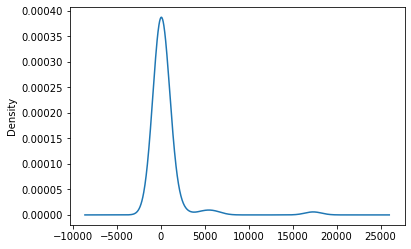

In [25]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [26]:
# Determine which values to replace if counts are less than ..?
replace_class=list(classification_counts[classification_counts < 1500].index)

# Replace in dataframe
for j in replace_class:
    application_df_new.CLASSIFICATION = application_df_new.CLASSIFICATION.replace(j,"Other")
    
# Check to make sure binning was successful
application_df_new.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [27]:
# Generate our categorical variable lists
application_cat = application_df_new.dtypes[application_df_new.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [28]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df_new[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
# Merge one-hot encoded features and drop the originals
application_df_new = application_df_new.merge(encode_df,left_index=True, right_index=True)
application_df_new = application_df_new.drop(application_cat,1)
application_df_new.head()

C:\Users\laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
# Split our preprocessed data into our features and target arrays
y = application_df_new["IS_SUCCESSFUL"].values
X = application_df_new.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\laura\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
# Add our first Dense layer, including the input layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

##another way to write it
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# #  YOUR CODE GOES HERE

# nn_model = tf.keras.models.Sequential()

# # First hidden layer
# #  YOUR CODE GOES HERE
# # Add our first Dense layer, including the input layer
# nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=43))

# # Second hidden layer
# nn_model.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=2))

# # Output layer
# #  YOUR CODE GOES HERE
# # Add the output layer that uses a probability activation function
# nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# # Check the structure of the model
# nn_model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 80)                3520      
                                                                 
 dense_18 (Dense)            (None, 30)                2430      
                                                                 
 dense_19 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 

Epoch 1/50
804/804 [==============================] - 1s 660us/step - loss: 0.5739 - accuracy: 0.7190
Epoch 2/50
804/804 [==============================] - 1s 667us/step - loss: 0.5575 - accuracy: 0.7314
Epoch 3/50
804/804 [==============================] - 1s 658us/step - loss: 0.5527 - accuracy: 0.7299
Epoch 4/50
804/804 [==============================] - 1s 665us/step - loss: 0.5518 - accuracy: 0.7310
Epoch 5/50
804/804 [==============================] - 1s 659us/step - loss: 0.5501 - accuracy: 0.7334
Epoch 6/50
804/804 [==============================] - 1s 680us/step - loss: 0.5491 - accuracy: 0.7334
Epoch 7/50
804/804 [==============================] - 1s 659us/step - loss: 0.5480 - accuracy: 0.7344
Epoch 8/50
804/804 [==============================] - 1s 656us/step - loss: 0.5475 - accuracy: 0.7334
Epoch 9/50
804/804 [==============================] - 1s 659us/step - loss: 0.5464 - accuracy: 0.7352
Epoch 10/50
804/804 [==============================] - 1s 655us/step - loss: 0.546

In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5544 - accuracy: 0.7249 - 213ms/epoch - 793us/step
Loss: 0.5544361472129822, Accuracy: 0.7248979806900024


<AxesSubplot:>

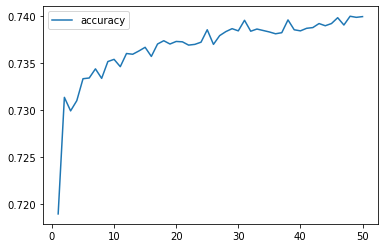

In [43]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

In [48]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [49]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq="epoch",
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
804/804 [==============================] - 1s 663us/step - loss: 0.5338 - accuracy: 0.7417
Epoch 2/50
804/804 [==============================] - 1s 678us/step - loss: 0.5332 - accuracy: 0.7423
Epoch 3/50
804/804 [==============================] - 1s 663us/step - loss: 0.5330 - accuracy: 0.7423
Epoch 4/50
804/804 [==============================] - 1s 660us/step - loss: 0.5342 - accuracy: 0.7415
Epoch 5/50
757/804 [===========================>..] - ETA: 0s - loss: 0.5332 - accuracy: 0.7424
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 679us/step - loss: 0.5331 - accuracy: 0.7425
Epoch 6/50
804/804 [==============================] - 1s 664us/step - loss: 0.5330 - accuracy: 0.7426
Epoch 7/50
804/804 [==============================] - 1s 673us/step - loss: 0.5329 - accuracy: 0.7423
Epoch 8/50
804/804 [==============================] - 1s 661us/step - loss: 0.5331 - accuracy: 0.7414
Epoch 9/50
804/804 [==========================

In [51]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")